In [41]:
import pandas as pd

cbb3 = pd.read_csv('cbb_trial1.csv', encoding='latin-1')
cbb3['TEAM'] = cbb3['TEAM'].str.replace('Ê', '')
cbb3['REC'] = cbb3['REC'].str.replace('Ð', '–')
cbb3 = cbb3.drop(cbb3.index[10695:], axis=0)
cbb3.reset_index(drop=True, inplace=True)
cbb3['SEED'] = None
cbb3['FINISH'] = None

# Iterate through the DataFrame
for index, row in cbb3.iterrows():
    if pd.notna(row['TEAM']) and 'seed' in row['TEAM']:
        # In this part, we extract SEED and FINISH information
        seed_part = row['TEAM'].split(' seed')[0].lstrip('Ê')  # We were getting an error saying we still had Ê before some integers, so we remove them with this line
        seed = int(seed_part) if seed_part.isdigit() else None  # Convert to integer, handling non-numeric values
        finish = row['TEAM'].split(',')[1]
        
        # Here, we update the values in the row above
        if index > 0:
            cbb3.at[index - 1, 'SEED'] = seed
            cbb3.at[index - 1, 'FINISH'] = finish

cbb3.reset_index(drop=True, inplace=True)
cbb3.drop('BARTHAG', axis=1, inplace=True)
cbb3[['WINS', 'LOSSES']] = cbb3['REC'].str.split('–', expand=True).apply(pd.to_numeric, errors='coerce')
cbb3['G'] = pd.to_numeric(cbb3['G'], errors='coerce')
cbb3.loc[:, 'ADJOE':'WAB'] = cbb3.loc[:, 'ADJOE':'WAB'].apply(pd.to_numeric, errors='coerce')
cbb3['SEED'] = pd.to_numeric(cbb3['SEED'], errors='coerce')
cbb3.to_csv('cbb_edited.csv')


In [42]:
df = pd.read_csv('cbb_edited.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(subset=['YEAR'])
df = df.dropna(subset=['FINISH'])
df['FINISH'] = df['FINISH'].str.strip()
df[df['FINISH'].astype(str) == 'R68']
filter = df['FINISH'] != 'R68'
df = df[filter]
df.to_csv('March_Madness.csv')

In [43]:
data = pd.read_csv('March_Madness.csv')
data['Is_Champ'] = data['FINISH'].apply(lambda x: 'Champion' if x == 'CHAMPS' else 'Non-Champion')
data['Is_8'] = data['FINISH'].apply(lambda x: 'Elite 8' if x == 'CHAMPS' or x == 'Finals' or x == 'Final Four' or x == 'Elite Eight' else 'Non-Elite 8')


champ_stats = data.groupby('Is_Champ').agg({'ADJOE': ['mean', 'std'], 'ADJDE': ['mean', 'std'], 'EFG%': ['mean', 'std'], '2P%': ['mean', 'std'], '3P%': ['mean', 'std']})
eight_stats = data.groupby('Is_8').agg({'ADJOE': ['mean', 'std'], 'ADJDE': ['mean', 'std'], 'EFG%': ['mean', 'std'], '2P%': ['mean', 'std'], '3P%': ['mean', 'std']})
champ_stats


ADJOE                ADJDE                 EFG%            \
                    mean       std       mean       std       mean       std   
Is_Champ                                                                       
Champion      119.786667  4.389739  91.000000  3.408603  53.713333  3.172396   
Non-Champion  110.693862  5.902339  95.693122  5.008694  52.091534  2.653554   

                    2P%                  3P%            
                   mean       std       mean       std  
Is_Champ                                                
Champion      52.553333  3.624296  37.393333  2.667387  
Non-Champion  51.176720  2.943567  35.869947  2.611652

In [44]:
eight_stats

ADJOE                ADJDE                 EFG%            \
                   mean       std       mean       std       mean       std   
Is_8                                                                          
Elite 8      116.049167  4.960347  92.195833  4.003704  53.128333  2.713371   
Non-Elite 8  110.091190  5.748198  96.108929  4.961677  51.972381  2.631599   

                   2P%                  3P%            
                  mean       std       mean       std  
Is_8                                                   
Elite 8      52.428333  3.145256  36.260000  2.597685  
Non-Elite 8  51.022500  2.889813  35.841429  2.618181

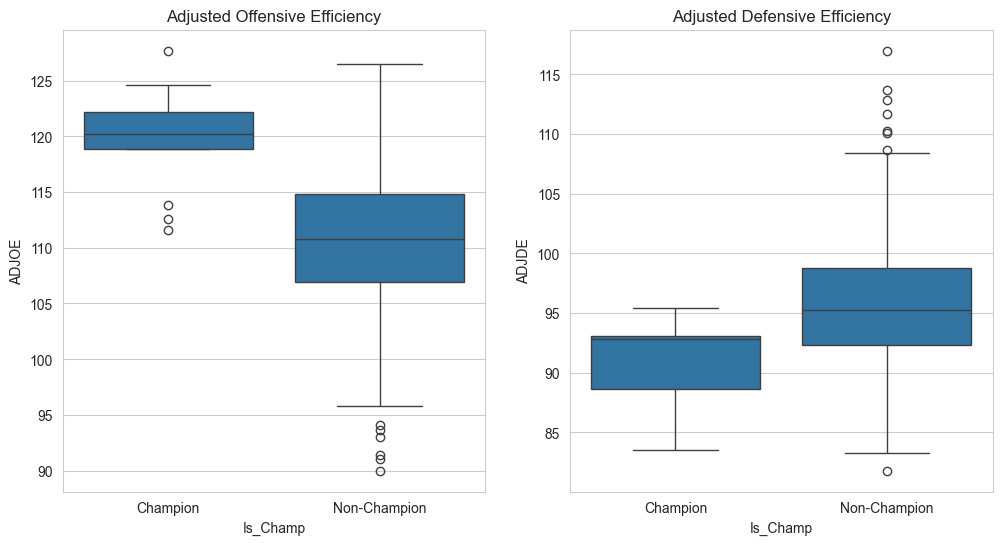

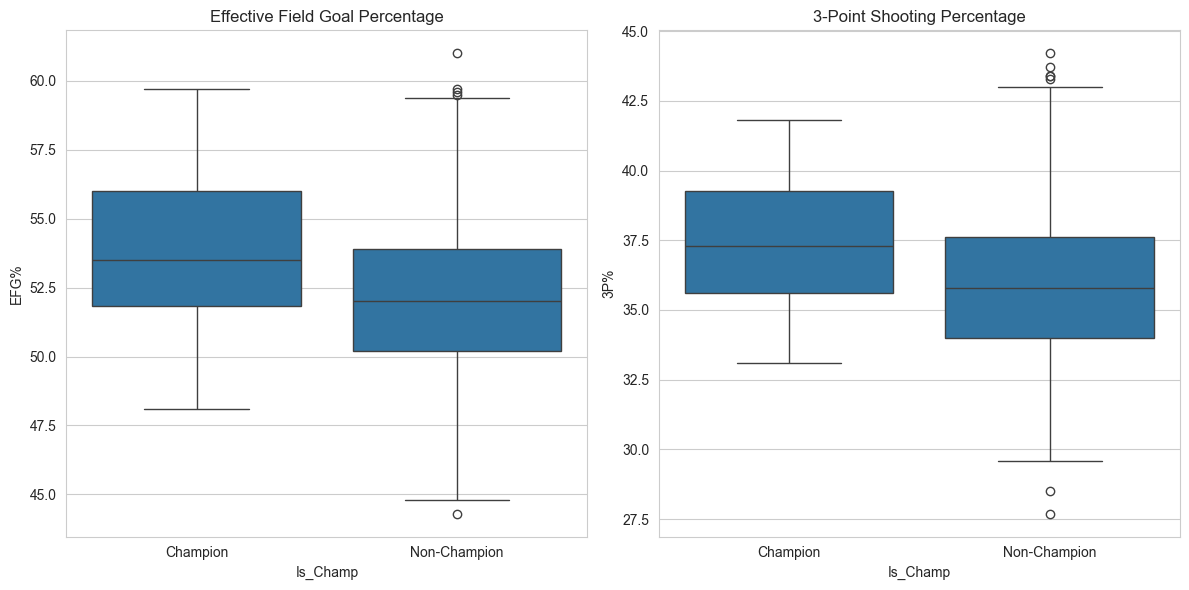

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Is_Champ', y='ADJOE', data=data)
plt.title('Adjusted Offensive Efficiency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Is_Champ', y='ADJDE', data=data)
plt.title('Adjusted Defensive Efficiency')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Is_Champ', y='EFG%', data=data)
plt.title('Effective Field Goal Percentage')

plt.subplot(1, 2, 2)
sns.boxplot(x='Is_Champ', y='3P%', data=data)
plt.title('3-Point Shooting Percentage')
plt.tight_layout()
plt.show()

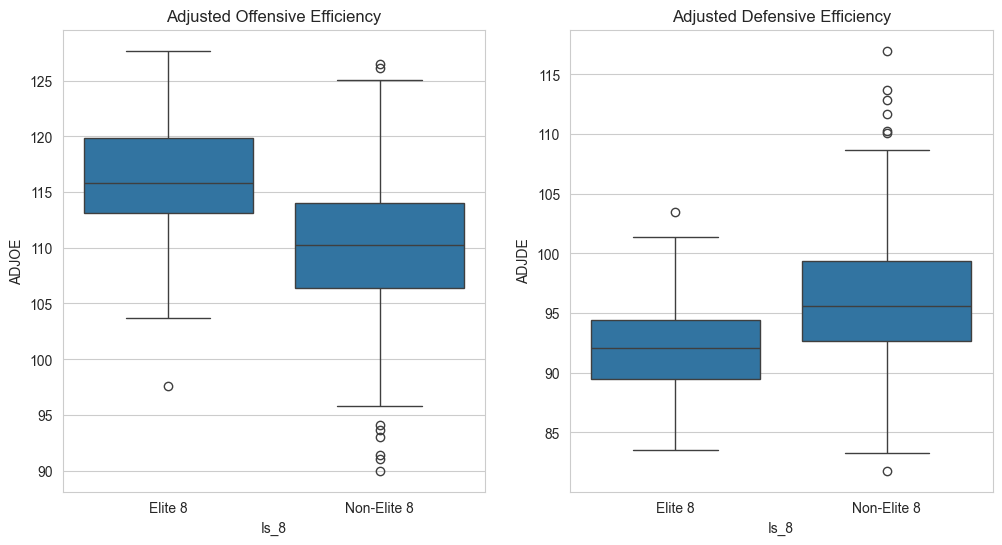

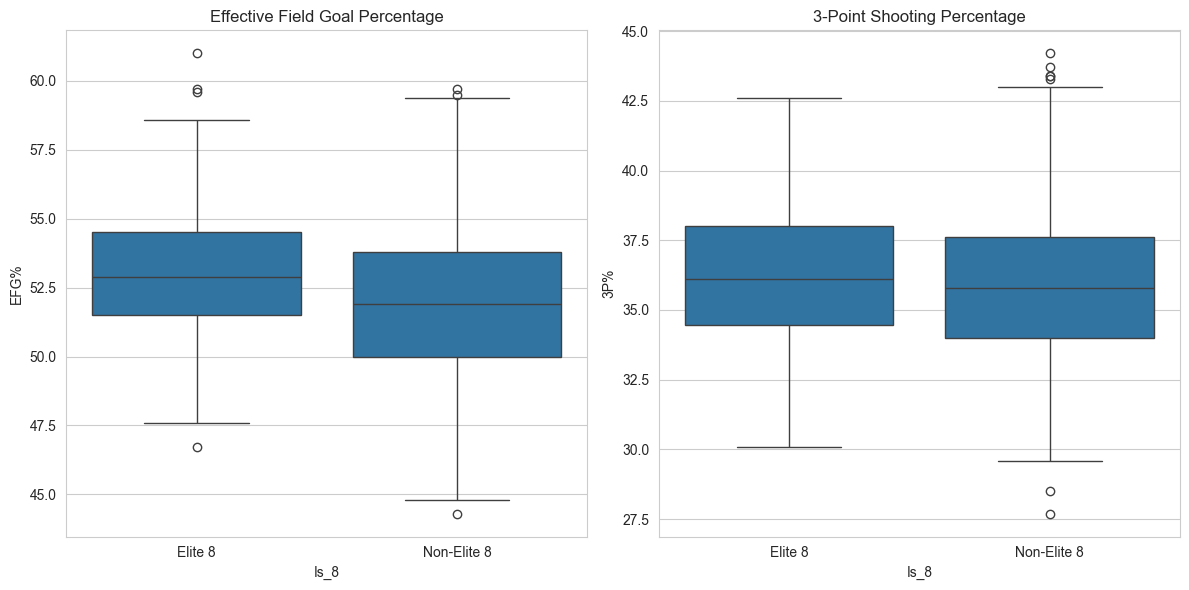

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Is_8', y='ADJOE', data=data)
plt.title('Adjusted Offensive Efficiency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Is_8', y='ADJDE', data=data)
plt.title('Adjusted Defensive Efficiency')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Is_8', y='EFG%', data=data)
plt.title('Effective Field Goal Percentage')

plt.subplot(1, 2, 2)
sns.boxplot(x='Is_8', y='3P%', data=data)
plt.title('3-Point Shooting Percentage')
plt.tight_layout()
plt.show()

In [47]:
def finish_to_numeric_corrected(finish):
    mapping = {'R64': 0, 'R32': 1, 'Sweet Sixteen': 2, 'Elite Eight': 3, 'Final Four': 4, 'Finals': 5, 'CHAMPS': 6}
    return mapping.get(finish, -1)  # Use -1 for any unexpected values

data['Finish_Numeric'] = data['FINISH'].apply(finish_to_numeric_corrected)



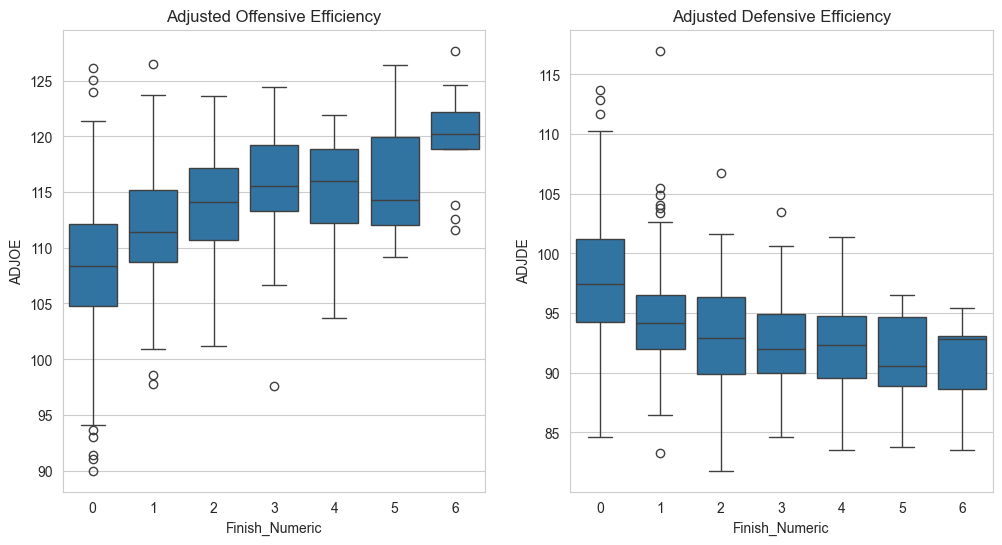

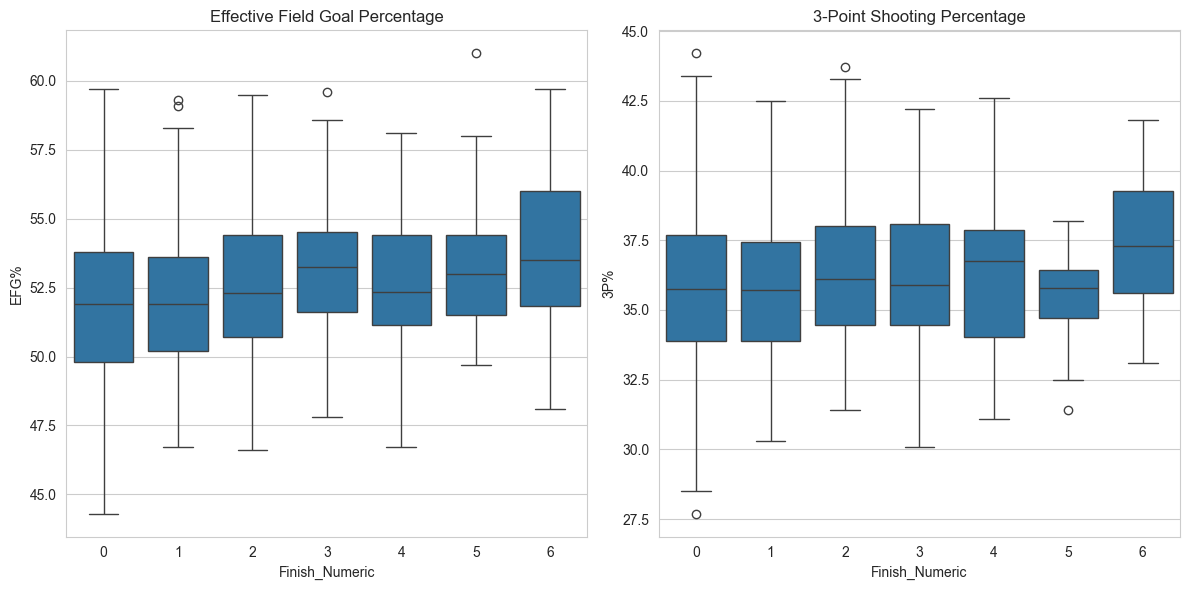

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Finish_Numeric', y='ADJOE', data=data)
plt.title('Adjusted Offensive Efficiency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Finish_Numeric', y='ADJDE', data=data)
plt.title('Adjusted Defensive Efficiency')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Finish_Numeric', y='EFG%', data=data)
plt.title('Effective Field Goal Percentage')

plt.subplot(1, 2, 2)
sns.boxplot(x='Finish_Numeric', y='3P%', data=data)
plt.title('3-Point Shooting Percentage')
plt.tight_layout()
plt.show()

In [49]:
round_stats = data.groupby('Finish_Numeric').agg({'ADJOE': ['mean', 'std'], 'ADJDE': ['mean', 'std'], 'EFG%': ['mean', 'std'], '2P%': ['mean', 'std'], '3P%': ['mean', 'std']})
round_stats

ADJOE                ADJDE                 EFG%  \
                      mean       std       mean       std       mean   
Finish_Numeric                                                         
0               108.290625  5.689159  97.682083  4.975578  51.828750   
1               111.777083  4.824824  94.483333  3.958188  51.950417   
2               113.921667  4.724159  93.067500  4.220561  52.590833   
3               115.646667  4.809470  92.711667  4.068735  53.220000   
4               115.036667  4.760070  92.250000  4.212768  52.543333   
5               115.946667  5.252464  91.220000  3.795524  53.346667   
6               119.786667  4.389739  91.000000  3.408603  53.713333   

                                2P%                  3P%            
                     std       mean       std       mean       std  
Finish_Numeric                                                      
0               2.683174  50.857292  2.938505  35.764583  2.659790  
1               2.469157  51.062500  2.750171  35.753333  2.502666  
2               2.670694  51.603333  2.911580  36.325000  2.645537  
3               2.539972  52.710000  2.879542  36.140000  2.716004  
4               2.681184  51.343333  2.850370  36.326667  2.584694  
5               3.041350  53.346667  3.923713  35.473333  1.790637  
6               3.172396  52.553333  3.624296  37.393333  2.667387

In [50]:
correlation_subset = data[['SEED', 'ADJDE', 'ADJOE', 'Finish_Numeric']].corr()
correlation_subset

,SEED,ADJDE,ADJOE,Finish_Numeric
SEED,1.000000,0.676829,-0.730585,-0.552906
ADJDE,0.676829,1.000000,-0.231019,-0.396324
ADJOE,-0.730585,-0.231019,1.000000,0.457826
Finish_Numeric,-0.552906,-0.396324,0.457826,1.000000


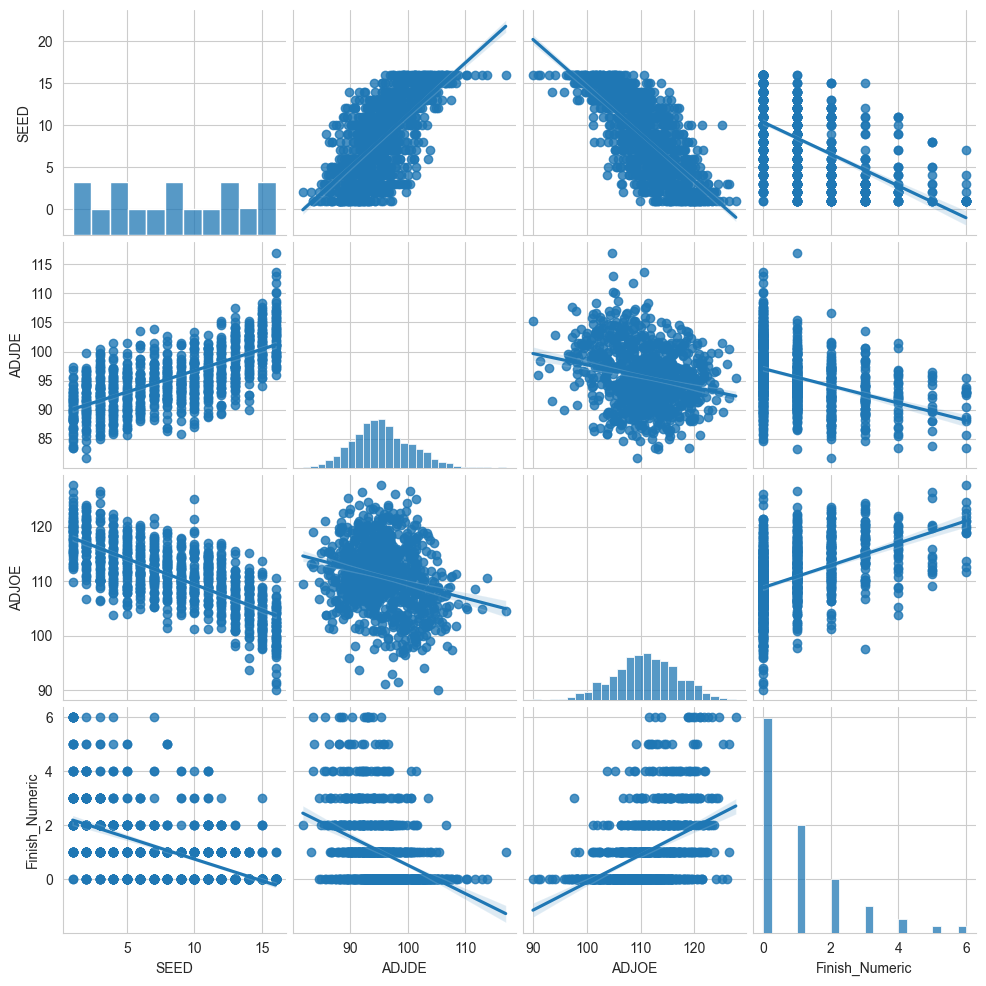

In [51]:
sns.pairplot(data[['SEED', 'ADJDE', 'ADJOE', 'Finish_Numeric']], kind='reg')
plt.show()

In [54]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data[['ADJDE', 'ADJOE']]
y = data['Is_Champ']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.98


In [56]:
import numpy as np

odds_ratios = np.exp(model.coef_[0])
odds_ratio_df = pd.DataFrame(odds_ratios, X.columns, columns=['Odds Ratio'])
odds_ratio_df

,Odds Ratio
ADJDE,1.375212
ADJOE,0.707241


In [59]:
import numpy as np

elite_8 = data[data['Is_8'] == 'Elite 8']
non_elite_8 = data[data['Is_8'] == 'Non-Elite 8']

def bootstrap_mean(data, n_bootstrap=10000):
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    return bootstrap_means

# Bootstrap for Elite 8
elite_8_means = bootstrap_mean(elite_8['ADJOE'])
non_elite_8_means = bootstrap_mean(non_elite_8['ADJOE'])

# Confidence intervals
elite_8_ci = np.percentile(elite_8_means, [2.5, 97.5])
non_elite_8_ci = np.percentile(non_elite_8_means, [2.5, 97.5])

# Difference in means
mean_diff = np.mean(elite_8_means) - np.mean(non_elite_8_means)

# P-value calculation
combined_means = np.concatenate((elite_8_means, non_elite_8_means))
mean_diffs = []
for _ in range(10000):
    np.random.shuffle(combined_means)
    diff = np.mean(combined_means[:len(elite_8_means)]) - np.mean(combined_means[len(elite_8_means):])
    mean_diffs.append(diff)
p_value = np.sum(np.abs(mean_diffs) >= np.abs(mean_diff)) / 10000

print('Elite 8 ADJOE Mean CI:', elite_8_ci)
print('Non-Elite 8 ADJOE Mean CI:', non_elite_8_ci)
print('Mean Difference:', mean_diff)
print('P-value:', p_value)

Elite 8 ADJOE Mean CI: [115.1625     116.91166667]
Non-Elite 8 ADJOE Mean CI: [109.69555357 110.487625  ]
Mean Difference: 5.959786261904753
P-value: 0.0


In [60]:
def bootstrap_mean(data, n_bootstrap=10000):
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    return bootstrap_means

# Bootstrap for Elite 8
elite_8_means = bootstrap_mean(elite_8['ADJDE'])
non_elite_8_means = bootstrap_mean(non_elite_8['ADJDE'])

# Confidence intervals
elite_8_ci = np.percentile(elite_8_means, [2.5, 97.5])
non_elite_8_ci = np.percentile(non_elite_8_means, [2.5, 97.5])

# Difference in means
mean_diff = np.mean(elite_8_means) - np.mean(non_elite_8_means)

# P-value calculation
combined_means = np.concatenate((elite_8_means, non_elite_8_means))
mean_diffs = []
for _ in range(10000):
    np.random.shuffle(combined_means)
    diff = np.mean(combined_means[:len(elite_8_means)]) - np.mean(combined_means[len(elite_8_means):])
    mean_diffs.append(diff)
p_value = np.sum(np.abs(mean_diffs) >= np.abs(mean_diff)) / 10000

print('Elite 8 ADJDE Mean CI:', elite_8_ci)
print('Non-Elite 8 ADJDE Mean CI:', non_elite_8_ci)
print('Mean Difference:', mean_diff)
print('P-value:', p_value)

Elite 8 ADJDE Mean CI: [91.4825 92.9225]
Non-Elite 8 ADJDE Mean CI: [95.76118452 96.44929762]
Mean Difference: -3.9133318809523843
P-value: 0.0
